##**Springboard - Capstone Project  **
###**AMES Housing data - IOWA market **
###**GOAL: To predict the sale price of the houses in IOWA neighborhoods as accurately as possible**
- Demonstrate the use creative feature engineering and
- Use Advanced Regression techniques

In [2]:
# AMES- IOWA Housing data - Basic data wrangling steps
# Check for Columns that contain data that can be used as features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import preprocessing 
from sklearn.cross_validation import cross_val_score,cross_val_predict,StratifiedKFold
#from sklearn.cross_validation import GridSearchCV
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor as xgb 
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from scipy import stats 




%matplotlib inline
df2 = pd.read_csv('train.csv', header=0)
df2.head(10)
test1 = pd.read_csv('test.csv', header=0)
test1.head(5)
test_idnumber = pd.read_csv('test.csv', header=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


###Data Wrangling
*Steps to find Missing Values*
- Listed the information of the Training set to check which data would be missing a high % ( Alley, PoolQC, Fence, MiscFeature, FireplaceQu are features that are missing a high volume of data)
-Lisiting all columns that have less 90% of missing data
-Find the percentage of Non-null data

In [3]:
# Get details of the rows for each variables to check for missing data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
test1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

We see that missing more than 90 % of data  the following columns 'PoolQC', 'MiscFeature', 'Alley', 'FirePlaceQC' are being excluded from our analysis. Other variables with Basement and Garage seem to have less missing values, we need to check if these variables have NaN since the houses have that particular feature missing. In that case we need to have that value NaN as 'None'.

We can group all variables with the  NaN values. Variables with similar categories have been grouped for comparison e.g. Basement, MasVnr, Garage etc. Non-categorical variables have also been included (e.g Pool Area, MasVnrArea) to help decide if the NaN in categorical variable of the same category need to be set to None or dropped. If PoolQC is NaN and PoolArea is 0  we can see that NaN  will be that there is no pool and should be set to None.

In [5]:
#Find all the columns or features that have missing data
frac = df2.shape[0]* .90 # Any columns with data below 1314 is considered to have insufficent data for analysis
percent_missing = (100*(df2.isnull().sum())/df2.shape[0]).round(1) 
percent_missing.sort_values(ascending = False).head(20)

PoolQC          99.5
MiscFeature     96.3
Alley           93.8
Fence           80.8
FireplaceQu     47.3
LotFrontage     17.7
GarageCond       5.5
GarageType       5.5
GarageYrBlt      5.5
GarageFinish     5.5
GarageQual       5.5
BsmtExposure     2.6
BsmtFinType2     2.6
BsmtFinType1     2.5
BsmtCond         2.5
BsmtQual         2.5
MasVnrArea       0.5
MasVnrType       0.5
Electrical       0.1
Utilities        0.0
dtype: float64

In [6]:
df2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

###Categorical Variables
The table below shows we can check for the  NaN values  and for Garage columns : Where there are NaN values, they are in all garage variables suggesting the absense of garages for those houses. So for Pool - PoolQC is set to NaN corresponding to PoolArea 0, which means the absence of Pool. This should be set to 'None' Basement, Alley, Fence, Miscfeatures has NaN values and means absence of this feature in the house and should be set to 'None'.  In case of the Electrical variable, when we find NaN value setting it to 'None' does not make sense as it is a feature that all houses should have. Since it is a small portion say 0.1% we can remove the rows with that value.

In [7]:
Categories = ['BsmtFinType1','BsmtFinType2','BsmtCond', 'BsmtQual','MasVnrType', 'GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt','MiscFeature','FireplaceQu','Fence','PoolQC','Alley'] 
df2[Categories] = df2[Categories].replace(np.nan, 'None', inplace = True)
df2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [8]:
Noncat = ['LotFrontage','MasVnrArea']
imp = preprocessing.Imputer(missing_values='NaN', copy = False, strategy='mean', axis=0) # imputing missing values with mean
imp.fit(df2[Noncat])

df2= pd.get_dummies(data=df2) # converting categorical variables to dummy variables encoded with 0,1....

###CORRELATION OF VARIABLES

We need to get the SalePrice correlation to all the relevant variables so that we can determine which features to be included. We will need to calculate the correlation of sales price to all the variables and eliminate out variables which correlate less than abs 0.5. Once we have these features we will then create a correltion matrix to determine. Once we have this, then similar features can either be merged into one compound feature or just one of the features included in subsequent analysis

In [9]:
corr1 = df2.corr()['SalePrice'] #array of correlation values for each variable vs. SalePrice 
corr =corr1[np.abs(corr1) > 0.5]  # just return correlation values greater than abs(0.5)
corr = pd.DataFrame(data=corr,columns= ['SalePrice'])
corr = corr.drop_duplicates().sort_values('SalePrice',ascending =False)
print(corr)

                SalePrice
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
KitchenQual_Ex   0.504094
KitchenQual_TA  -0.519298
ExterQual_TA    -0.589044


###Corelation Matrix

We see that the OverallQual and GroundFloor Living Area has a good correlation to the Sales Price. So we can make below a heatmap to show the correlation matrix for all the variables which are above 50%

Other variables which showed > 50% correlation with sales price were:
OverallQual
GrLivArea
GarageCars
GarageArea
TotalBsmtSF
1stFlrSF
FullBath
TotRmsAbvGrd
YearBuilt

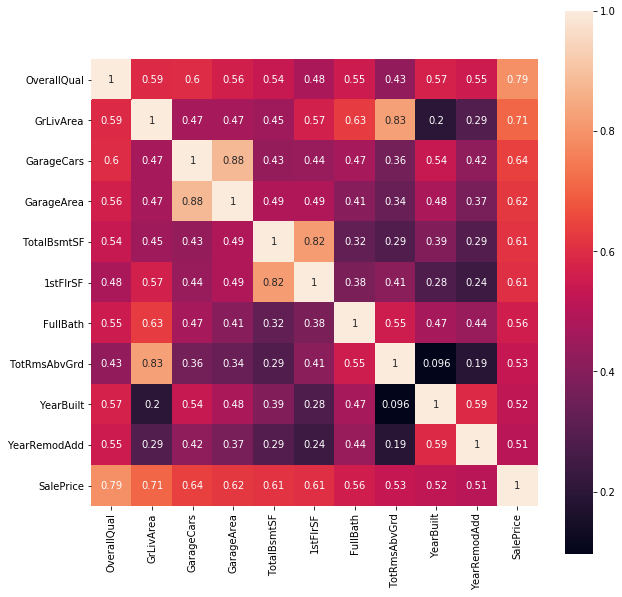

In [10]:
corr_var = ['OverallQual','GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt','YearRemodAdd','SalePrice']
df2 = df2[corr_var]
df2
corr_matrix = df2.corr()
f,ax = plt.subplots(figsize =(10,10))
sns.heatmap(corr_matrix, annot=True, vmax=1,square=True)

In [11]:
labels_to_drop = ['GarageArea','TotRmsAbvGrd','1stFlrSF']
df2= df2.drop(labels_to_drop, axis =1)
df2.head(10)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,856,2,2003,2003,208500
1,6,1262,2,1262,2,1976,1976,181500
2,7,1786,2,920,2,2001,2002,223500
3,7,1717,3,756,1,1915,1970,140000
4,8,2198,3,1145,2,2000,2000,250000
5,5,1362,2,796,1,1993,1995,143000
6,8,1694,2,1686,2,2004,2005,307000
7,7,2090,2,1107,2,1973,1973,200000
8,7,1774,2,952,2,1931,1950,129900
9,5,1077,1,991,1,1939,1950,118000


###Scatter Plots and Outlier detection
We now check into dropping the Outliers by analysing the Scatter plots since they are used in Outlier detection. For ouliers, we consider anything more that -1.5 and 1.5 Interquartile Range, three or more standard deviations from the mean as outliers. Also any data that are isolated points from the trend line can be dropped as well.


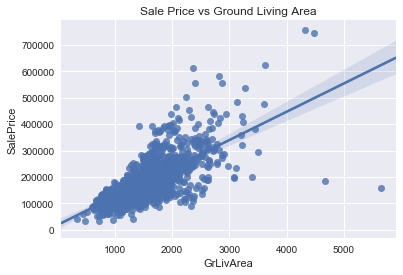

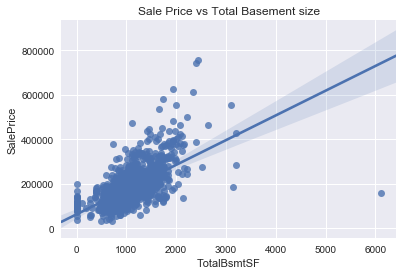

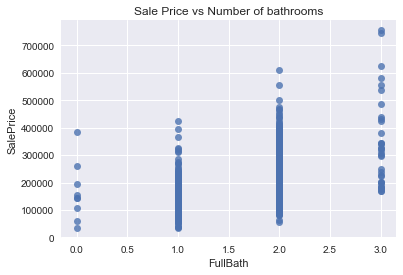

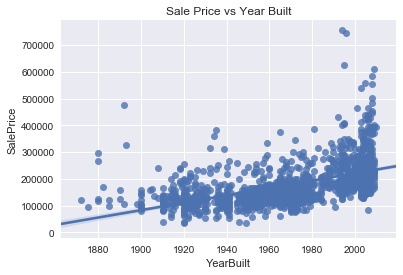

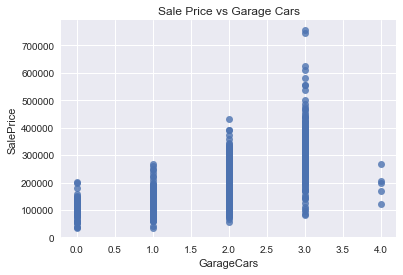

In [12]:
plt.figure(1)
sns.set(color_codes=True)
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=df2)
plt.title('Sale Price vs Ground Living Area')

plt.figure(2)
sns.set(color_codes=True)
ax = sns.regplot(x="TotalBsmtSF", y="SalePrice", data=df2)
plt.title('Sale Price vs Total Basement size')

plt.figure(3)
sns.set(color_codes=True)
ax = sns.regplot(x="FullBath", y="SalePrice", data=df2, fit_reg = False)
plt.title('Sale Price vs Number of bathrooms')

plt.figure(4)
sns.set(color_codes=True)
ax = sns.regplot(x="YearBuilt", y="SalePrice", data=df2)
plt.title('Sale Price vs Year Built')


plt.figure(5)
sns.set(color_codes=True)
ax = sns.regplot(x="GarageCars", y="SalePrice", data=df2, fit_reg = False)
plt.title('Sale Price vs Garage Cars')

###Drop Outliers 

Four outliers in the graphs above will be dropped. These corresponding to
-Ground living area > 4500 
-Year Built graph sales price between 7000 and 8000 
-The isolated TotalBsmtSF point > 6000 is also included as part of these outliers which will be removed

In [13]:
df2 =df2.drop(df2[df2.GrLivArea == 5642].index)
df2 =df2.drop(df2[df2.GrLivArea == 4476].index)
df2 =df2.drop(df2[df2.SalePrice == 755000].index)
df2 =df2.drop(df2[df2.SalePrice == 745000].index)

###Normality and Linearity

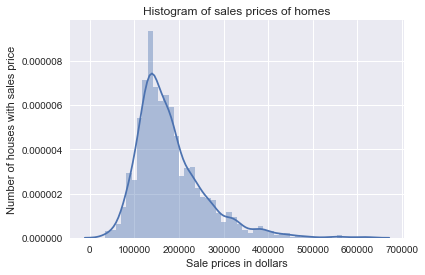

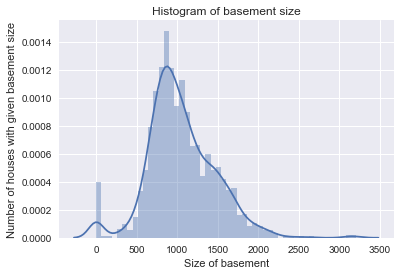

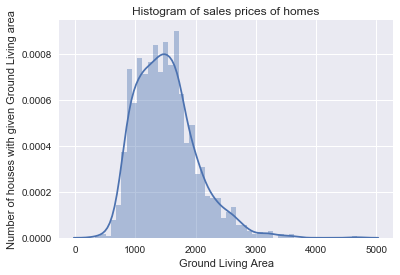

In [20]:
#HISTOGRAM FOR normal distribution
plt.figure(1)
sns.distplot(df2['SalePrice'], 50)
plt.xlabel("Sale prices in dollars")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()


plt.figure(2)
sns.distplot(df2['TotalBsmtSF'], 50)
plt.xlabel("Size of basement")
plt.ylabel("Number of houses with given basement size") 
plt.title("Histogram of basement size")
plt.grid(True) 
plt.show()

plt.figure(3)
sns.distplot(df2['GrLivArea'], 50)
plt.xlabel("Ground Living Area")
plt.ylabel("Number of houses with given Ground Living area") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()

###*Standardisation of datasets*
We see that the distributtions above are skewed, we would need to have the data standardised so individual features more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. One way of doing this is by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation. Another way is to do a log transofrmation can be applied althought it can’t be applied to zero or negative values. Our second histogram above shows some zero values for basement size which would not be suitable for log transformation unless they are removed.

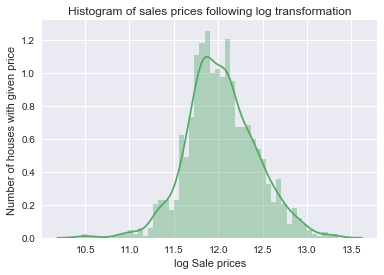

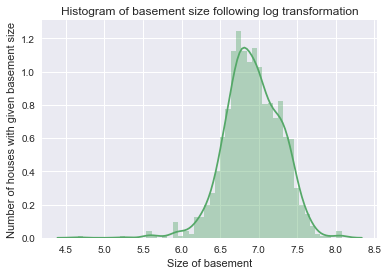

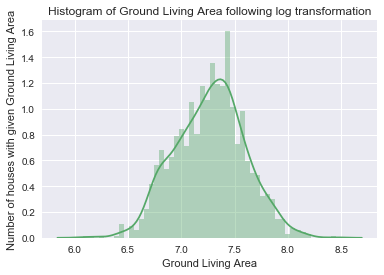

In [18]:
# We see that there are zero values for basement size so we can go ahead and remove them
# Removing zero values in TotalBsmtSF to perform log transormation afterwards 
train_new = df2.drop(df2[df2['TotalBsmtSF']==0].index, axis =0)

train_new.loc[:,['SalePrice','TotalBsmtSF','GrLivArea','YearBuilt']] = np.log(train_new[['SalePrice','TotalBsmtSF','GrLivArea','YearBuilt']])
plt.figure(1)
sns.distplot(train_new['SalePrice'], 50, color = "g")
plt.xlabel("log Sale prices")
plt.ylabel("Number of houses with given price") 
plt.title("Histogram of sales prices following log transformation")
plt.grid(True) 
plt.show()

plt.figure(2)
sns.distplot(train_new['TotalBsmtSF'], 50, color ="g")
plt.xlabel("Size of basement")
plt.ylabel("Number of houses with given basement size") 
plt.title("Histogram of basement size following log transformation")
plt.grid(True) 
plt.show()

plt.figure(3)
sns.distplot(train_new['GrLivArea'], 50, color ="g")
plt.xlabel("Ground Living Area")
plt.ylabel("Number of houses with given Ground Living Area") 
plt.title("Histogram of Ground Living Area following log transformation")
plt.grid(True) 
plt.show()

###Now all the distributions above are normally distributed

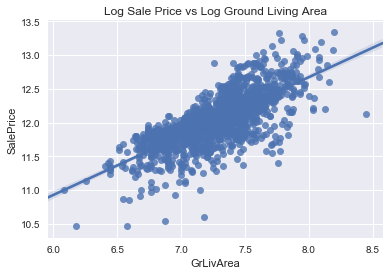

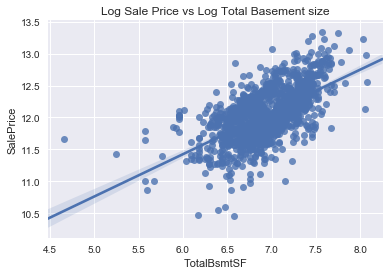

In [30]:
plt.figure()
sns.set(color_codes=True)
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=train_new)
plt.title('Log Sale Price vs Log Ground Living Area')

plt.figure()
sns.set(color_codes=True)
ax = sns.regplot(x="TotalBsmtSF", y="SalePrice", data=train_new)
plt.title('Log Sale Price vs Log Total Basement size')

###Scatter Plots after the transformation
We can see that the dense clutter in the scatter plots are now shifted towards the centre following log transormation. As a result, we will have the data exhibit less less heteroskedasticity (absence of the conical shape like in the previous plots).

###Cleaning of the test data
We are going to perform the same data wrangling, cleaning and normalizing the data as we did with the training data

In [31]:
var = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath','YearBuilt']

test_id = test_idnumber[['Id']] # store id data n separate single column data frame 
test1= test1[var]
test1.head(10)
test1.shape[0] -((test1[test1.notnull()].count())) # number of missing values. It looks like Garage Cars and TotalBsmtSF have one
# Probably the same row. We can either drop this observation or impute it.


# number of missing values. It looks like Garage Cars and TotalBsmtSF have one
# Probably the same row. We can either drop this observation or impute it.

test1['GarageCars'] = test1['GarageCars'].fillna((test1['GarageCars'].mean()))
test1['TotalBsmtSF'] = test1['TotalBsmtSF'].fillna((test1['TotalBsmtSF'].mean()))

# taking log transform 
test1[['TotalBsmtSF']] = test1[['TotalBsmtSF']].replace(0,1)

test1.loc[:,['TotalBsmtSF','GrLivArea', 'YearBuilt']] = np.log(test1[['TotalBsmtSF','GrLivArea','YearBuilt']])
#test_id


In [ ]:
###Modelling

In [32]:
train_y = train_new['SalePrice']  #saving the output variable as a seperate dataset 
train_buff = train_new.drop('SalePrice', axis =1) # dropping output variable from train dataset 
train_x = train_buff.drop('YearRemodAdd', axis =1) # dropping output variable from train dataset 
train_x.head(10)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,7,7.444249,2,6.752270,2,7.602401
1,6,7.140453,2,7.140453,2,7.588830
2,7,7.487734,2,6.824374,2,7.601402
3,7,7.448334,3,6.628041,1,7.557473
4,8,7.695303,3,7.043160,2,7.600902
5,5,7.216709,2,6.679599,1,7.597396
6,8,7.434848,2,7.430114,2,7.602900
7,7,7.644919,2,7.009409,2,7.587311
8,7,7.480992,2,6.858565,2,7.565793
9,5,6.981935,1,6.898715,1,7.569928


###Modelling on the data
Ridge Regression
Lasso Regression
Support Vector Machine
Gradient boosting Regression

In [35]:
## Ridge Regression with built in cross validation ####
# by default it performs Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation.

Ames_Ridge = linear_model.Ridge(fit_intercept=True, normalize=True, alpha = 0.01) 
Ames_Ridge.fit(train_x, train_y)  
Ames_Ridge_score = cross_val_score(Ames_Ridge,train_x, train_y, cv = 10, scoring = 'r2')



### Support Vecotr Regression #####
X_scaler = preprocessing.StandardScaler()
train_x = X_scaler.fit_transform(train_x)
Ames_SVR = svm.SVR(kernel='rbf', gamma='auto',C = 1,epsilon = 0.1)
Ames_SVR.fit(train_x, train_y)
Ames_SVR_score = cross_val_score(Ames_SVR, train_x, train_y, cv = 10, scoring='r2') 

#### LassoCV######

Ames_lasso = linear_model.LassoCV()
Ames_lasso.fit(train_x, train_y)
Ames_lasso_score = cross_val_score(Ames_lasso, train_x, train_y, cv = 10, scoring='r2') 

### Gradient Boosting Regressor ##

Ames_xgb = xgb(learning_rate=0.01, n_estimators=500, max_depth=3, subsample= 0.5)
Ames_xgb.fit(train_x, train_y)
Ames_xgb_score = cross_val_score(Ames_xgb, train_x, train_y, cv = 10, scoring='r2') 

 #R squared coefficients for all the models after training 

print ("")
print("The R2 score using for Ridge is %f" % (Ames_Ridge_score.mean()))
print("The R2 score for Lasso is %f" % (Ames_lasso_score.mean())) 
print("The R2 score for SVR is %f" % (Ames_SVR_score.mean())) 
print("The R2 score for Gradient Boosting Regression is %f" % (Ames_xgb_score.mean())) 



The R2 score using for Ridge is 0.825067
The R2 score for Lasso is 0.825010
The R2 score for SVR is 0.826482
The R2 score for Gradient Boosting Regression is 0.834250


###Predicted values of the Sale Prices of the homes in AMES Iowa

In [37]:
#Prediction of the Sales Prices
test_x = X_scaler.fit_transform(test1)
# Predictions on the test set
#predict = pd.DataFrame(np.exp(Ames_lasso.predict(test_x)), columns= ['SalePrice'])   
predict = pd.DataFrame(np.exp(Ames_xgb.predict(test_x)), columns= ['SalePrice'])  
predict

submission = pd.concat([test_idnumber, predict],axis =1)
submission.to_csv("submission_predict.csv",header = True, index =False)

#FEature importance from GBS
# Complicated - modifying parameters of Gradient boasting
# X1, X2, X2* new constructed features, capture outliers 
# Errors, corrections for the 17% score missing
# Use caae: Features that are actionable and useful to improve the house to increase the price.
# GBS - scikit - partial dependence plots, features with a range to find the gradient